LAPTOP PRICE ANALYSIS USING MACHINE LEARNING

Ever wondered what really affects the price of a laptop? In this project, we dive deep into a real world dataset to uncover the factors that drive laptop pricing from the brand and processor to RAM, storage type, screen quality, and more. Using Python and machine learning techniques, this analysis helps us build a model that can predict laptop prices based on their features. It’s an exciting journey through data cleaning, visualization, and model building  perfect for sharpening your data analytics and finance skills.

In [1]:

# =======<<<<<< STEP 1: Import Libraries >>>>>>=======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
# =======<<<<<< STEP 2: Load Data >>>>>>=======
df = pd.read_excel("laptop_prices.xlsx")  # Upload this file to same folder


In [3]:
# =======<<<<<< STEP 3: Preprocessing >>>>>>=======
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Convert binary columns
df['Touchscreen'] = df['Touchscreen'].apply(lambda x: 1 if x == 'Yes' else 0)
df['IPSpanel'] = df['IPSpanel'].apply(lambda x: 1 if x == 'Yes' else 0)

# Extract Company from GPU
df['GPU Brand'] = df['GPU_company']
df = pd.read_excel("laptop_prices.xlsx")
df_original = df.copy()
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


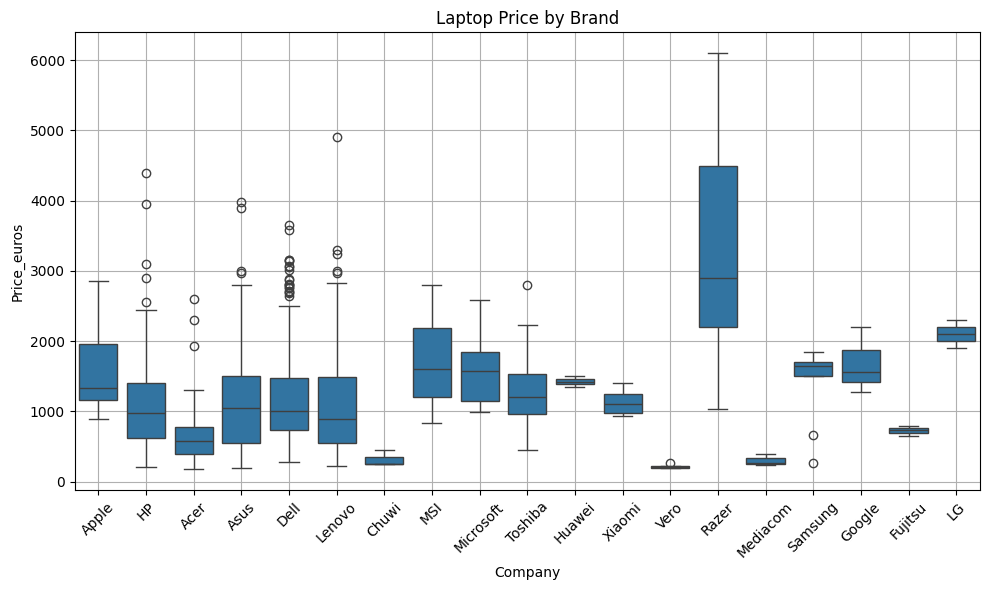

In [4]:

# =======<<<<<< Visualization: Laptop Price by Brand >>>>>>=======
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Price_euros', data=df_original)
plt.title("Laptop Price by Brand")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# Extract Company from CPU
df['CPU Brand'] = df['CPU_model'].apply(lambda x: x.split()[0])

# Convert categorical features to one-hot
df = pd.get_dummies(df, drop_first=True)


In [6]:
# =======<<<<<< STEP 4: Feature & Target Separation >>>>>>=======
X = df.drop(['Price_euros', 'Product'], axis=1, errors='ignore')
y = df['Price_euros']


In [7]:
# =======<<<<<< STEP 5: Train/Test Split >>>>>>=======
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)


In [8]:
# =======<<<<<< STEP 6: Model Training – Linear Regression >>>>>>=======
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_r2 = r2_score(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)


In [9]:
# =======<<<<<< STEP 7: Model Training – Random Forest >>>>>>=======
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_r2 = r2_score(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)


In [10]:
# =======<<<<<< STEP 8: Display Metrics >>>>>>=======
print("Linear Regression R²:", round(lr_r2, 2))
print("Linear Regression MSE:", round(lr_mse, 2))
print("Random Forest R²:", round(rf_r2, 2))
print("Random Forest MSE:", round(rf_mse, 2))


Linear Regression R²: -7.3
Linear Regression MSE: 4120779.35
Random Forest R²: 0.87
Random Forest MSE: 64626.52


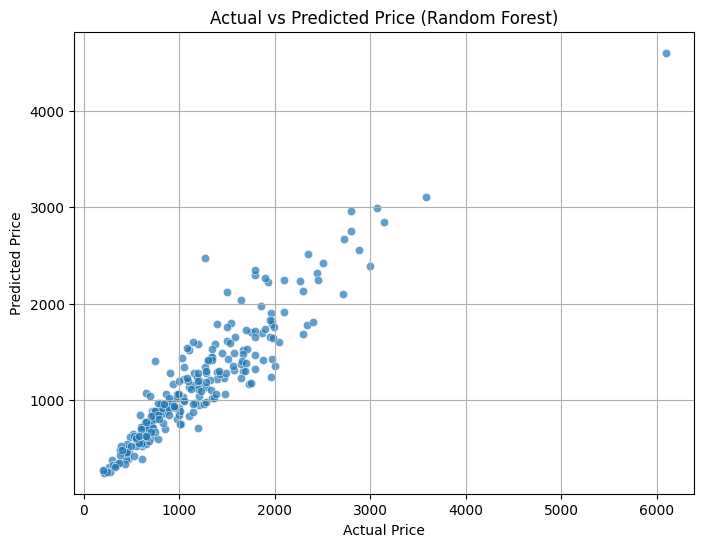

In [11]:
# =======<<<<<< STEP 9: Visualization – Actual vs Predicted >>>>>>=======
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=rf_preds, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.grid(True)
plt.show()


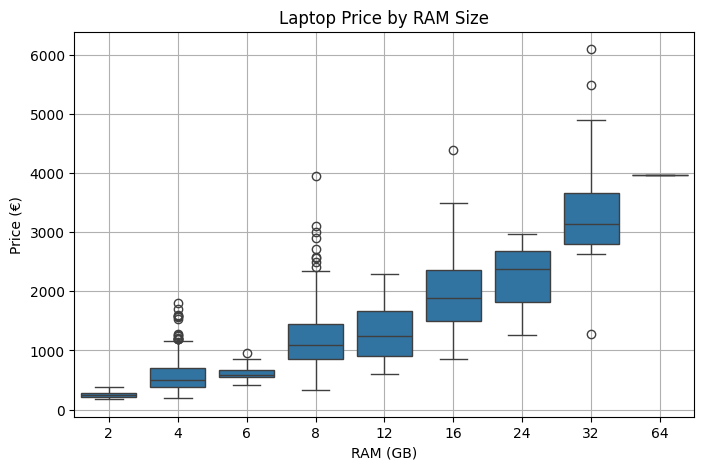

In [12]:
# =======<<<<<< STEP 10: Save Cleaned Dataset (Optional) >>>>>>=======
df.to_csv("Cleaned_Laptop_Data.csv", index=False)

# =======<<<<<< Visualization: Price by RAM >>>>>>=======
plt.figure(figsize=(8, 5))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title("Laptop Price by RAM Size")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (€)")
plt.grid(True)
plt.show()



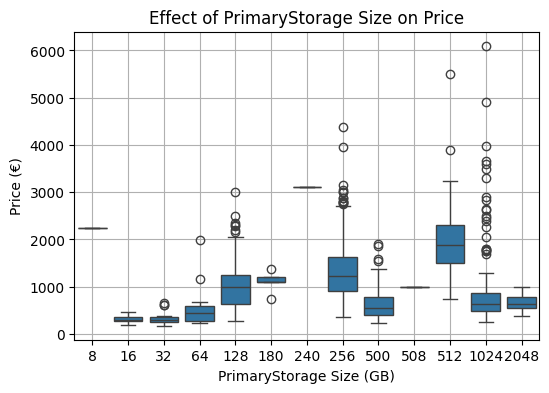

In [13]:
# =======<<<<<< Visualization: PrimaryStorage vs Price >>>>>>=======
plt.figure(figsize=(6, 4))
sns.boxplot(x='PrimaryStorage', y='Price_euros', data=df)
plt.title("Effect of PrimaryStorage Size on Price")
plt.xlabel("PrimaryStorage Size (GB)")
plt.ylabel("Price (€)")
plt.grid(True)
plt.show()


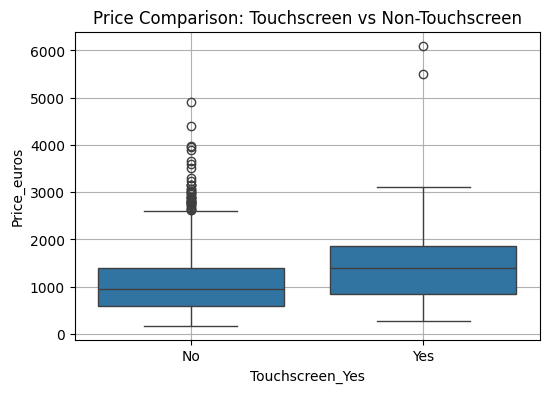

In [14]:
# =======<<<<<< Visualization: Touchscreen vs Non-Touchscreen >>>>>>=======
plt.figure(figsize=(6, 4))
sns.boxplot(x='Touchscreen_Yes', y='Price_euros', data=df)
plt.title("Price Comparison: Touchscreen vs Non-Touchscreen")
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.show()


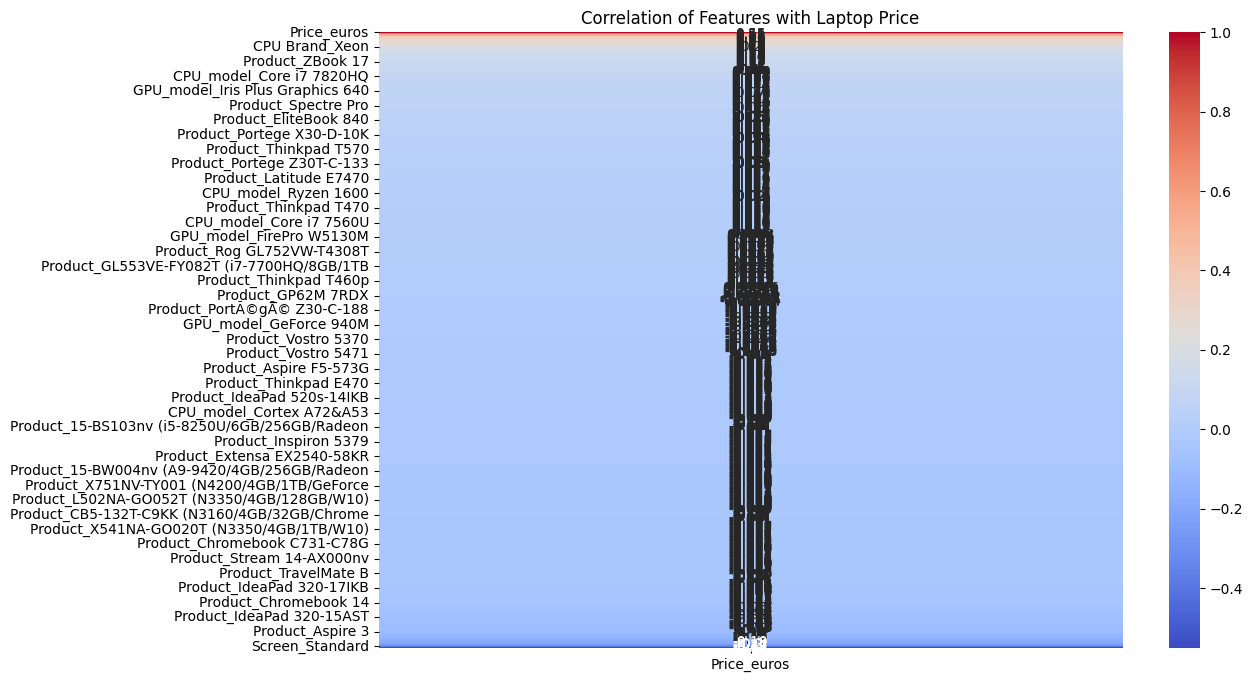

In [15]:
# =======<<<<<< Correlation Heatmap >>>>>>=======
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr[['Price_euros']].sort_values(by='Price_euros', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Laptop Price")
plt.show()


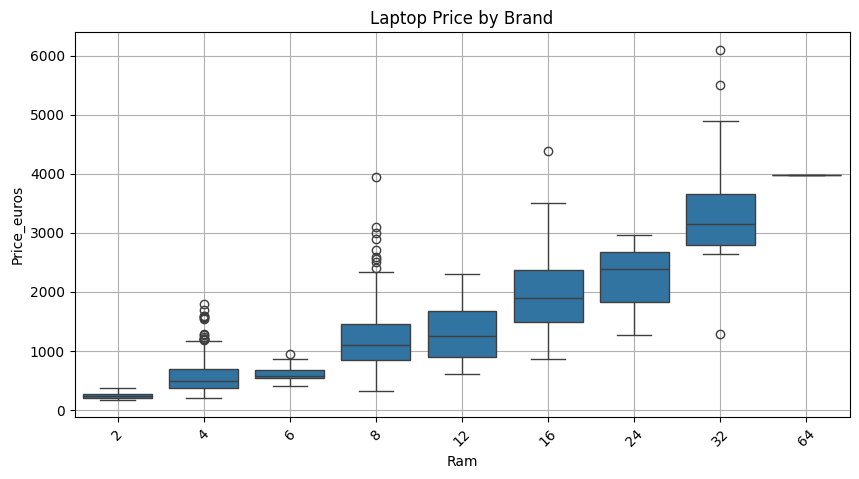

In [16]:
# =======<<<<<< Visualization: Price by Brand (Redundant RAM Label) >>>>>>=======
plt.figure(figsize=(10, 5))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title("Laptop Price by Brand")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()